# US Treasury Yield Curve 2020

Downloaded from https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield

In [2]:
import feedparser
feed = feedparser.parse("data/DailyTreasuryYieldCurveRateData.xml")

data = []
for entry in feed["entries"]: 
    data.append([s.strip() for s in entry["m_properties"].split("\n")[1:-1]])

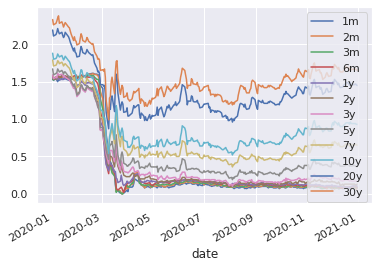

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.DataFrame(data, columns=["date", "1m", "2m", "3m", "6m", "1y", "2y", "3y", "5y", "7y", "10y", "20y", "30y"])
df.index = pd.to_datetime(df.pop("date"))
df = df.astype("float")
df.plot();

In [4]:
df.describe()

,1m,2m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
count,251.000000,251.000000,251.000000,251.000000,251.00000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,0.352709,0.360558,0.360279,0.370956,0.37012,0.388645,0.420996,0.533068,0.721833,0.889203,1.348207,1.556135
std,0.544508,0.540254,0.530174,0.518741,0.49029,0.468157,0.451369,0.417008,0.383998,0.353224,0.303910,0.284045
min,0.000000,0.000000,0.000000,0.020000,0.09000,0.110000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.080000,0.090000,0.100000,0.110000,0.12000,0.140000,0.180000,0.300000,0.495000,0.670000,1.150000,1.370000
50%,0.100000,0.110000,0.120000,0.140000,0.15000,0.170000,0.210000,0.360000,0.560000,0.740000,1.240000,1.470000
75%,0.140000,0.150000,0.165000,0.190000,0.19000,0.250000,0.305000,0.445000,0.680000,0.925000,1.450000,1.660000
max,1.610000,1.610000,1.590000,1.580000,1.56000,1.580000,1.610000,1.670000,1.790000,1.880000,2.210000,2.380000


In [38]:
dr = df.diff()[1:]
dr.describe()

,1m,2m,3m,6m,1y,2y,3y,5y,7y,10y,20y,30y
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.00000,250.000000,250.000000,250.000000,250.000000
mean,-0.005800,-0.005880,-0.005800,-0.005920,-0.005840,-0.005800,-0.00568,-0.00524,-0.004560,-0.003800,-0.002960,-0.002720
std,0.033718,0.033501,0.034785,0.033368,0.029485,0.033359,0.03752,0.04377,0.049479,0.055017,0.063544,0.065022
min,-0.300000,-0.220000,-0.230000,-0.220000,-0.210000,-0.250000,-0.23000,-0.22000,-0.220000,-0.210000,-0.250000,-0.310000
25%,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.020000,-0.01000,-0.02000,-0.020000,-0.030000,-0.030000,-0.030000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.01000,0.01000,0.020000,0.020000,0.030000,0.030000
max,0.070000,0.100000,0.110000,0.160000,0.120000,0.120000,0.18000,0.17000,0.240000,0.290000,0.350000,0.290000


## Level PCA via scikit-learn

In [51]:
from sklearn.decomposition import PCA
pca12 = PCA(n_components=12)
pca12.fit(df)

PCA(n_components=12)

In [52]:
print(pca12.explained_variance_ / np.sum(pca12.explained_variance_) * 100)

[9.64425056e+01 2.76947945e+00 5.99490572e-01 1.28080879e-01
 2.55041501e-02 1.10939283e-02 7.14085191e-03 5.57920427e-03
 3.86253349e-03 2.98986329e-03 2.48571637e-03 1.78720951e-03]


In [53]:
print(pca12.explained_variance_ * 100)

[2.33486302e+02 6.70488092e+00 1.45136043e+00 3.10082475e-01
 6.17452819e-02 2.68582849e-02 1.72879281e-02 1.35071955e-02
 9.35115336e-03 7.23842789e-03 6.01789346e-03 4.32681563e-03]


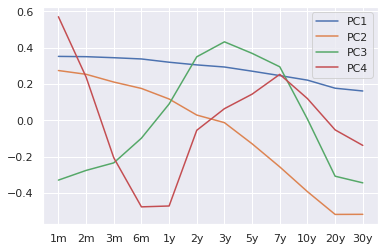

In [54]:
plt.plot(pca12.components_[:4].T);
plt.legend(["PC1", "PC2", "PC3", "PC4"]);
plt.xticks(range(12), df.columns);

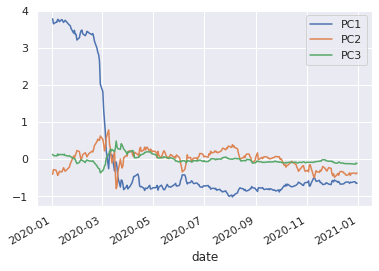

In [56]:
# Project each observation onto the three PCs.
pca3 = PCA(n_components=3)
pca3.fit(df)
df3 = pd.DataFrame(pca3.transform(df.values), index=df.index, columns=["PC1", "PC2", "PC3"])
df3.plot();

## Change PCA via scikit-learn

In [45]:
from sklearn.decomposition import PCA
pca12 = PCA(n_components=12)
pca12.fit(dr)

PCA(n_components=12)

In [46]:
print(pca12.explained_variance_ / np.sum(pca12.explained_variance_) * 100)

[72.21215338 16.94107027  4.99109661  2.11123983  0.96248035  0.68932546
  0.58357538  0.44418149  0.40457406  0.30431584  0.22326309  0.13272423]


In [48]:
print(pca12.explained_variance_ * 100)

[1.70631228 0.4003032  0.1179354  0.04988682 0.0227426  0.01628818
 0.01378939 0.01049563 0.00955974 0.00719073 0.00527552 0.00313616]


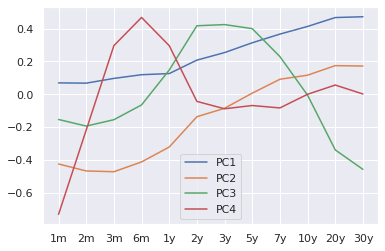

In [50]:
plt.plot(pca12.components_[:4].T);
plt.legend(["PC1", "PC2", "PC3", "PC4"]);
plt.xticks(range(12), df.columns);

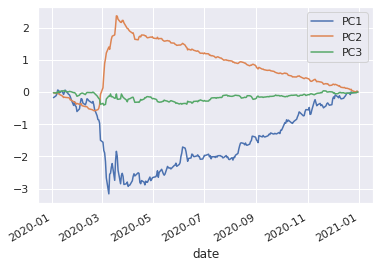

In [44]:
# Project each observation onto the three PCs.
pca3 = PCA(n_components=3)
pca3.fit(dr)
dr3 = pd.DataFrame(pca3.transform(dr.values), index=dr.index, columns=["PC1", "PC2", "PC3"])
dr3.cumsum().plot();

## Change PCA via SVD

In [12]:
# To use SVD, first the data must be demeaned.
U, S, Vh = np.linalg.svd((dr - dr.mean()).values, full_matrices=False)

print(f"U: {U.shape}")
print(f"S: {S.shape}")
print(f"Vh: {Vh.shape}")

U: (250, 12)
S: (12,)
Vh: (12, 12)


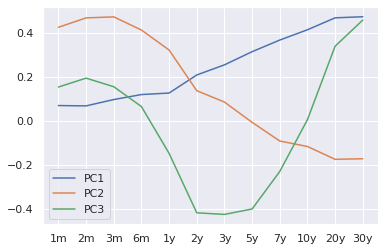

In [37]:
# In this case, Vh corresponds to the PCs because of the shape of the data matrix.
# Notice that the signs may be equal or inverted.
plt.plot(Vh[:3,:].T);
plt.legend(["PC1", "PC2", "PC3"]);
plt.xticks(range(12), df.columns);

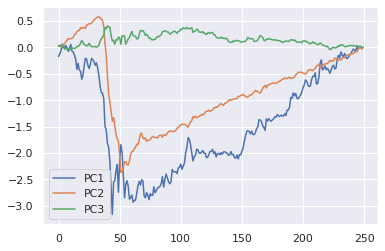

In [36]:
# How about projections?
# This is same as scikit's fit, except for the signs.
plt.plot(np.cumsum(U[:,:3] @ np.diag(S[:3]), 0));
plt.legend(["PC1", "PC2", "PC3"]);